In [1]:
# notes from a collaborative work session for the 
# text analysis symposium 2018 at Berkeley
# http://www.textxd.org/programs/textxd2018/

# worksheet, hacking around with the case law data from the caselaw access project at
# https://case.law/

# I'm using the illinois data, which is available without registration on the site. 
# in this workbook, I use the jsonl file. You can use the API, but it limits to 100 per page.

# a lot of this is based on the "Text analysis and deep learning tools" session from the
# wednesday session: 
# https://github.com/TextXD/charters4textxd2018/blob/master/notebooks/wem_workshop_textXD18.ipynb

# there's no specific analysis in this workbook
# it's notes from figuring out how to load files, 
# use the GenSim api and so forth

In [49]:
import requests
import json
import re
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_non_alphanum
from nltk import word_tokenize

import json

#for visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt

max_records = 10000

data = []
with open('data.jsonl') as f:
    for i, line in enumerate(f):
        data.append(json.loads(line))
        if i % 1000 == 0:
            print(i, "processed")
        # set max of 10,000 rows for now, increase or remove this to get the entire data set
        if i > max_records:
            break

#print(data[0]['casebody']['data']['opinions'][0]['text'])

opinion_texts = []
for i in range(len(data)):
    if data[i]['casebody']['data']['opinions']:
        text = data[i]['casebody']['data']['opinions'][0]['text'].lower()
        text = strip_non_alphanum(text)
        if i % 1000 == 0:
            print(i, "cleaned")
        text = remove_stopwords(text)
        opinion_texts.append(text)

tokenized_sentences = []
for s in opinion_texts:
    tokenized_sentences.append(word_tokenize(s))

model = gensim.models.Word2Vec(tokenized_sentences, size=100, window=5, min_count=1, 
                               sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

print("model ready")

0 processed
1000 processed
2000 processed
3000 processed
4000 processed
5000 processed
6000 processed
7000 processed
8000 processed
9000 processed
10000 processed
0 cleaned
1000 cleaned
2000 cleaned
3000 cleaned
4000 cleaned
5000 cleaned
6000 cleaned
7000 cleaned
8000 cleaned
9000 cleaned
10000 cleaned
model ready


In [51]:
# don't print this, too long
#model.wv.vocab

# do this instead
print(model.wv.index2word[:500])

#print(model.wv.most_similar('laws'))
#print(model.wv.most_similar('tyranny'))

print(len(model.wv.vocab))

model.wv.similarity('awful', 'distressing')

['court', 'case', 'judgment', 'said', 'evidence', 'v', 'defendant', 'plaintiff', 's', 'law', 'time', 'property', 'land', 'shall', 'act', 'right', 'county', 'jury', 'appellant', 'sale', 'error', 'question', 'contract', 'deed', 'decree', 'action', 'money', 'opinion', 'title', 'cause', 'justice', 'state', 'note', 'record', 'appellee', 'parties', 'statute', 'paid', 'given', 'payment', 'company', 'defendants', 'held', 'reversed', 'pay', 'circuit', 'day', 'possession', 'delivered', 'party', 'suit', 'trial', 'estate', 'section', 'power', 'affirmed', 'fact', 'cases', 'notice', 'having', 'taken', '1', 'ill', 'mortgage', 'rule', 'execution', 'general', 'premises', 'order', 'person', 'mr', 'damages', 'agreement', 'term', 'dollars', 'facts', 'city', 'filed', 'brought', 'sold', 'r', 'consideration', 'purpose', 'verdict', 'required', 'complainant', 'plea', 'purchase', 'claim', 'set', 'necessary', 'proof', 'sum', 'lands', 'plaintiffs', 'legal', 'new', 'sufficient', 'subject', 'public', 'j', 'received

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8570211

In [52]:
#Here are some phrases you might investigate through cosine similarity
#Laws are like cobwebs, which may catch small flies, but let wasps and hornets break through. (Jonathan Swift)
#Law is order, and good law is good order. (Aristotle)
#A law is valuable, not because it is a law, but because there is right in it. (Edmund Burke)
#Lawyers are the only persons in whom ignorance of the law is not punished. (Jeremy Bentham)
#Law is a bottomless pit. (John Arbuthnot)
#Law is not law, if it violates the principles of eternal justice. (LYDIA MARIA CHILD, speech, 1861)
#Bad laws are the worst sort of tyranny. EDMUND BURKE, speech at Bristol previous to the election of 1780

In [53]:
# it would also be interesting to look into word similarities between different body of works (do the associations differ
# between california, new york, illinois, federal?)

In [54]:
model.wv.most_similar(positive=['bad','evil'], negative=['bad','miserable'])

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mischief', 0.301006019115448),
 ('remedied', 0.28209587931632996),
 ('perpetration', 0.22305752336978912),
 ('obviate', 0.21766918897628784),
 ('oppression', 0.21488329768180847),
 ('perversion', 0.2088327407836914),
 ('perpetrated', 0.20768854022026062),
 ('interpose', 0.2053283154964447),
 ('certiorari', 0.20526215434074402),
 ('injustice', 0.20336689054965973)]

In [55]:
# removing certain vectors from an association
good_words = model.wv.most_similar(positive=['good'], topn=20)
good_words = [word for word, similarity in good_words]
good_words

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['faith',
 'bad',
 'goodness',
 'perfect',
 'marketable',
 'repute',
 'ation',
 'honesty',
 'ás',
 'purposo',
 'utmost',
 'behavior',
 'assurance',
 'shielded',
 'sufficient',
 'relying',
 'faff',
 'avarranty',
 'staunch',
 'itsell']

In [56]:
%matplotlib inline

In [57]:
virtues_vices = ['courage', 'charity', 'honor', 'truth', 'honesty', 
                 'gluttony', 'greed', 'lust', 'cruelty', 'pride']

bad_score = [model.wv.similarity(['bad'], word) for word in virtues_vices]
good_score = [model.wv.similarity(['good'], word) for word in virtues_vices]

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


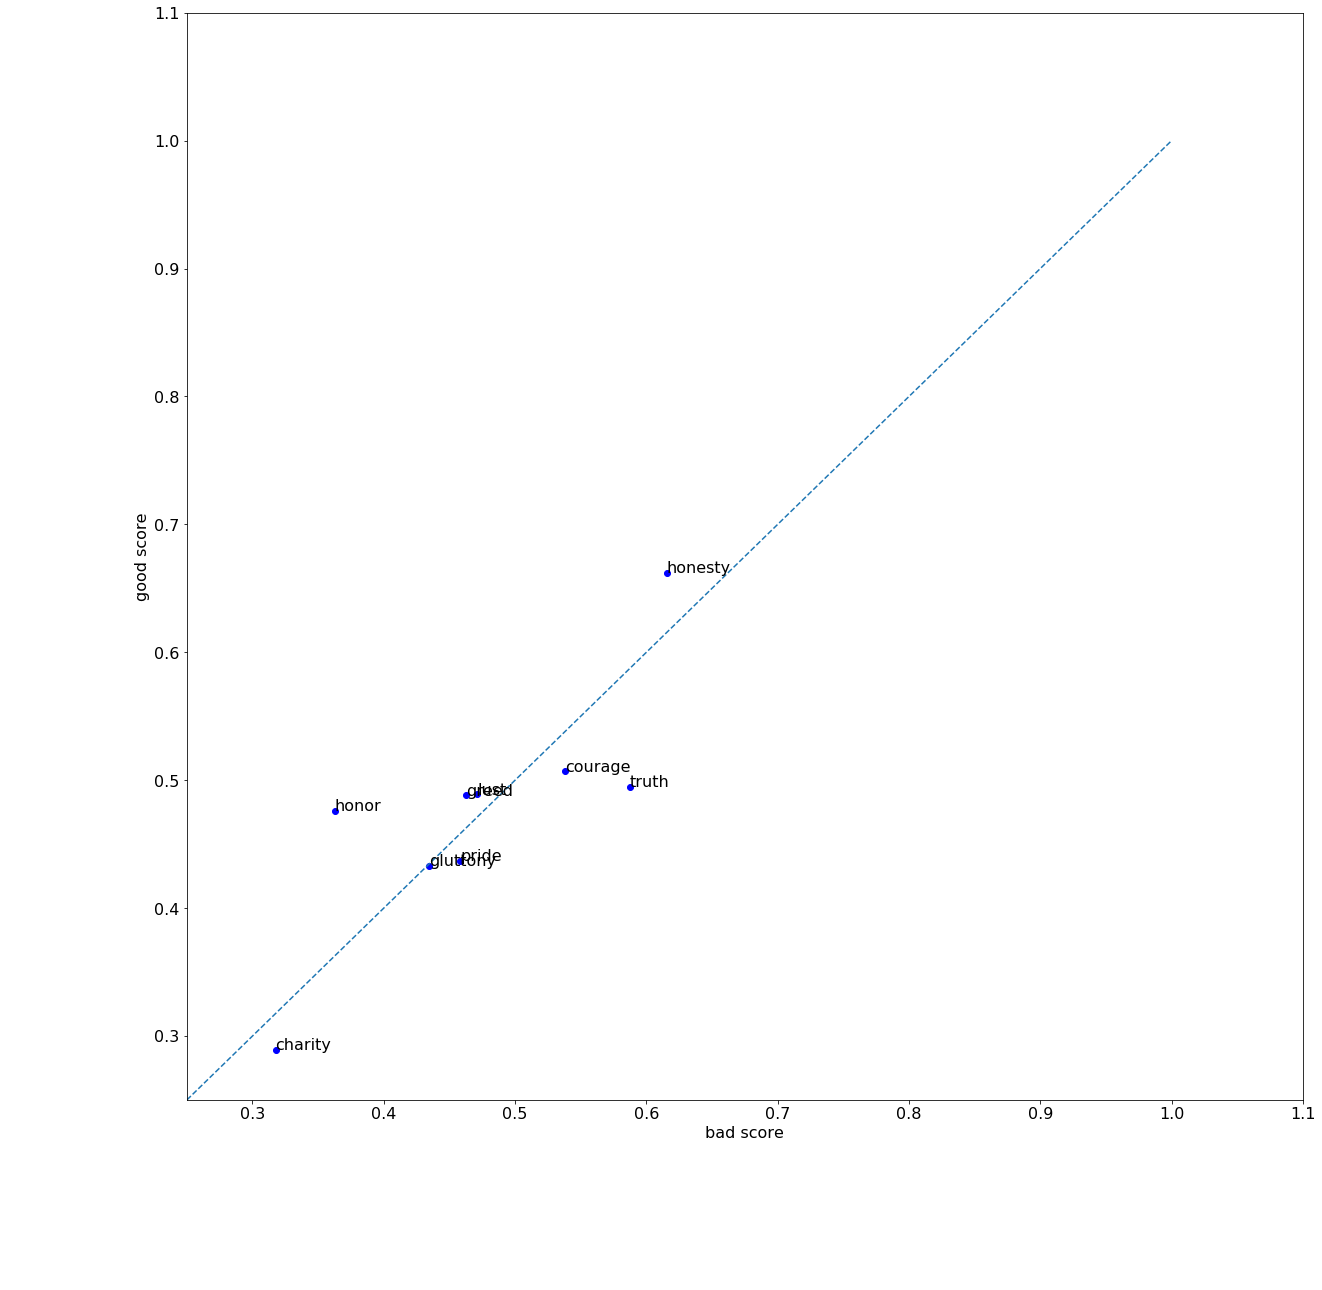

In [58]:
import matplotlib
_, ax = plt.subplots(figsize=(20,20))
ax.scatter(bad_score, good_score, alpha=1, color='b')
for i in range(len(virtues_vices)):
    ax.annotate(virtues_vices[i], (bad_score[i], good_score[i])).set_fontsize(16)
ax.set_xlim(.25, 1.1)
ax.set_ylim(.25, 1.1)
ax.yaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontsize(16)
plt.xlabel('bad score')
plt.ylabel('good score')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.plot([0, 1], [0, 1], linestyle='--');

In [59]:
# how is cosine similarity created?
# again, looking at
model.wv.similarity('awful', 'distressing')

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8570211

In [60]:
awful_vec = model.wv['awful']

In [61]:
distressing_vec = model.wv['distressing']

In [62]:
# doing the cosine similarity calc manually
import numpy as np

In [63]:
np.dot(awful_vec, distressing_vec) / (np.linalg.norm(awful_vec) * np.linalg.norm(distressing_vec))

0.8570211

In [64]:
awful_vec

array([-0.31362852, -0.15847397,  0.13265887,  0.02189761,  0.14401945,
        0.00924784,  0.02692908, -0.02083626,  0.3128171 , -0.02384561,
       -0.25580886, -0.12553619,  0.09364942, -0.1271923 , -0.24882141,
       -0.203848  , -0.02581852, -0.24249794,  0.18450122, -0.0648392 ,
       -0.07264283,  0.0481397 ,  0.14497088,  0.15836714, -0.10166796,
        0.12418229,  0.09610423, -0.21698225,  0.08069287,  0.03568811,
       -0.23902005, -0.17888664, -0.06998954,  0.1342195 ,  0.07923318,
        0.07407627,  0.02450543,  0.20889013,  0.02107553,  0.14399675,
        0.19240142,  0.299914  ,  0.07505684, -0.08643586,  0.10644616,
        0.34269246,  0.3065298 , -0.15828384, -0.14140767, -0.10417313,
       -0.13052344, -0.04417381, -0.02129531,  0.1259869 ,  0.06576082,
       -0.07259357, -0.08837488, -0.07071731,  0.05833337, -0.1302672 ,
       -0.06527091,  0.01754004,  0.01010562, -0.12951575,  0.175798  ,
        0.03040691,  0.2077844 , -0.00636132,  0.05888578,  0.10

In [65]:
model.wv.similar_by_vector(model.wv['convicted'] - model.wv['guilty'])

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('convicted', 0.49230676889419556),
 ('indicted', 0.3734748363494873),
 ('indictment', 0.3482024371623993),
 ('tennessee', 0.33730101585388184),
 ('spirituous', 0.3250056207180023),
 ('pardon', 0.30778151750564575),
 ('1789', 0.30282026529312134),
 ('reign', 0.30148452520370483),
 ('anne', 0.29383015632629395),
 ('naturalization', 0.2869228422641754)]

In [66]:
import random

In [67]:
# creating a random array of numbers from -1 to 1, using it to find closest words to 
# the random array. 

random_vector = [random.uniform(-1, 1) for i in range(100)]
random_array = np.array(random_vector)

model.wv.similar_by_vector(random_array)

/Users/boushey/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('favorable', 0.3906325101852417),
 ('inclination', 0.37863779067993164),
 ('touch', 0.3572250306606293),
 ('credence', 0.3544011116027832),
 ('credibility', 0.35403335094451904),
 ('inclines', 0.350077360868454),
 ('testimony', 0.34902697801589966),
 ('aspect', 0.343315064907074),
 ('contradictory', 0.34140124917030334),
 ('weight', 0.3293871283531189)]